In [1]:
import os

os.chdir("/Users/jlenz/Desktop/Thesis/GrooveTransformer")

import logging
matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)  # or logging.INFO if you want to see INFO messages


import torch
import numpy as np

from data.src.dataLoaders import GrooveDataSet_Density, GrooveDataSet_Control


/Users/jlenz/opt/miniconda3/envs/GrooveTransformer/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jlenz/opt/miniconda3/envs/GrooveTransformer/lib/python3.9/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
Could not import fluidsynth. AUDIO rendering will not work.
Holoviews not installed. Please install holoviews to be able to generate heatmaps.


In [2]:
training_dataset = GrooveDataSet_Density(
        dataset_setting_json_path="data/dataset_json_settings/4_4_BeatsAndFills_gmd.json",
        subset_tag="train",
        max_len=32,
        load_as_tensor=False,
        down_sampled_ratio=None,
        move_all_to_gpu=False,
        hit_loss_balancing_beta=0,
        genre_loss_balancing_beta=0)

densities = training_dataset.get_densities()

print(np.amax(densities))
print(np.amin(densities))

INFO:data.Base.dataLoaders:Loading gmd dataset
INFO:data.Base.dataLoaders:Loading Cached Version from: data/gmd/resources/cached/beat_division_factor_[4]/drum_mapping_label_ROLAND_REDUCED_MAPPING/time_signature_['4-4']


subset length: 16496


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16496/16496 [00:07<00:00, 2192.78it/s]
INFO:data.Base.dataLoaders:Loaded 16496 sequences


1.0
0.0


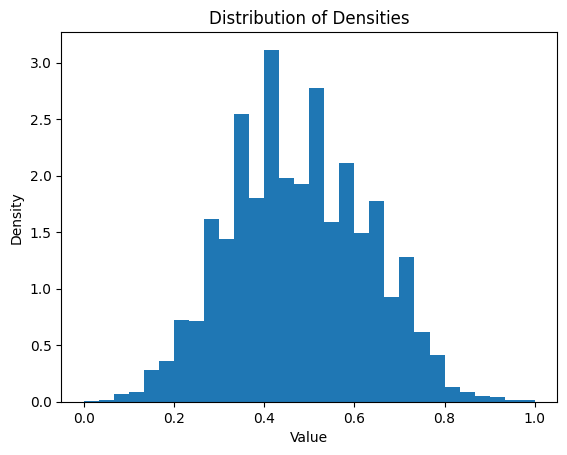

AttributeError: module 'matplotlib' has no attribute 'pyplot'

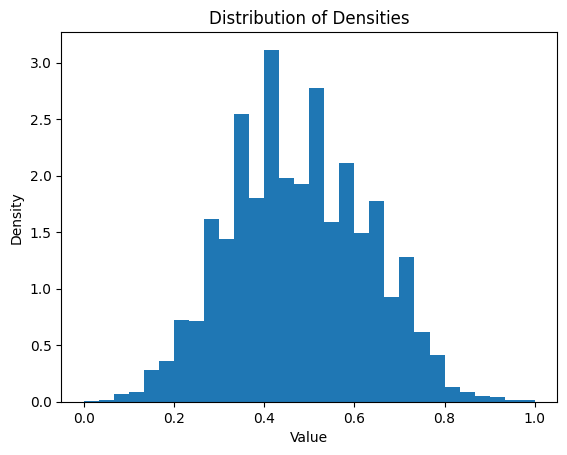

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [3]:
# Plotting the histogram

import matplotlib
import matplotlib.pyplot as plt
plt.clf()
plt.hist(densities, bins=30, density=True)  # 'bins' determines the number of bins in the histogram
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Densities')
plt.show()

In [ ]:
ctrl_dataset = GrooveDataSet_Control(
        dataset_setting_json_path="data/dataset_json_settings/4_4_BeatsAndFills_gmd.json",
        subset_tag="train",
        max_len=32,
        tapped_voice_idx=2,
        collapse_tapped_sequence=True,
        load_as_tensor=False,
        down_sampled_ratio=None,
        move_all_to_gpu=False,
        hit_loss_balancing_beta=0,
        genre_loss_balancing_beta=0,
        normalize_densities=True,
        normalize_intensities=True,
        custom_genre_mapping_dict=None
    )


INFO:data.Base.dataLoaders:Loading gmd dataset
INFO:data.Base.dataLoaders:Loading Cached Version from: data/gmd/resources/cached/beat_division_factor_[4]/drum_mapping_label_ROLAND_REDUCED_MAPPING/time_signature_['4-4']


subset length: 16495


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16495/16495 [00:08<00:00, 2027.26it/s]


In [ ]:
densities = ctrl_dataset.get_densities()
intensities = ctrl_dataset.get_intensities()

plt.clf()
plt.hist(intensities, bins=200, density=True)  # 'bins' determines the number of bins in the histogram
plt.xlabel('Value')
plt.ylabel('Intensity')
plt.title('Distribution of Intensities')
plt.show()

In [ ]:


plt.clf()
plt.scatter(densities, intensities, c=densities, cmap='cool')

# Label the axes and the chart:
plt.xlabel('density')
plt.ylabel('intensity')
plt.title('Density vs Intensity')

# Show the plot:
plt.show()
